In [2]:
using Pkg
Pkg.activate("/media/mat/HDD/AdaptiveTransportMap/")

 Activating environment at `/media/mat/HDD/AdaptiveTransportMap/Project.toml`


In [3]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions
using Test
using ForwardDiff
using SpecialFunctions
using OrthoMatchingPursuit
using BenchmarkTools

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been

In [4]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
# Plots.font("sans-serif")
# clibrary(:colorbrewer)
# gr()
pyplot()

using LaTeXStrings
# PyPlot.rc("text", usetex = "true")
# rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
# rcParams["text.usetex"] = true;
PyPlot.rc("font", family = "CMU Serif")
PyPlot.matplotlib[:rc]("mathtext",fontset="cm")        #computer modern font 
PyPlot.matplotlib[:rc]("font",family="serif",size=12)

In [48]:
Nx = 20
Ny = 5
Ne = 500
H = rand(Ny, Nx)

σy = 0.1
Σy = Matrix(σy^2*I, Ny, Ny)
ϵy = AdditiveInflation(zeros(Ny), σy)

σx = 1.5
Σx = Matrix(σx^2*I, Nx, Nx)
L = cholesky(inv(Σx))
ϵx = AdditiveInflation(zeros(Nx), σx)

AdditiveInflation(20, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.25 0.0 … 0.0 0.0; 0.0 2.25 … 0.0 0.0; … ; 0.0 0.0 … 2.25 0.0; 0.0 0.0 … 0.0 2.25], [1.5 0.0 … 0.0 0.0; 0.0 1.5 … 0.0 0.0; … ; 0.0 0.0 … 1.5 0.0; 0.0 0.0 … 0.0 1.5])

In [49]:
H

5×20 Array{Float64,2}:
 0.6692     0.111314  0.550376   0.783575  …  0.0660648  0.335764  0.366526
 0.556775   0.431365  0.719513   0.346738     0.208382   0.89315   0.980273
 0.189261   0.457337  0.0331862  0.952802     0.9303     0.701338  0.563639
 0.76337    0.42995   0.718296   0.353499     0.803004   0.985326  0.684684
 0.0958477  0.044418  0.158482   0.361058     0.336123   0.965271  0.501527

In [50]:
X = zeros(Ny+Nx, Ne)
ϵx(X, Ny+1, Ny+Nx)

In [51]:
xstar = σx*randn(Nx)
ystar = H*xstar

5-element Array{Float64,1}:
 -2.959713356302306
 -3.948283530560863
 -4.431208751881421
 -5.246289302857807
 -2.410062580611097

In [52]:
X

25×500 Array{Float64,2}:
  0.0          0.0         0.0         …   0.0        0.0         0.0
  0.0          0.0         0.0             0.0        0.0         0.0
  0.0          0.0         0.0             0.0        0.0         0.0
  0.0          0.0         0.0             0.0        0.0         0.0
  0.0          0.0         0.0             0.0        0.0         0.0
 -0.800239     0.0449221   1.69008     …  -1.19042   -0.0169941   1.57752
 -1.92539      1.32759    -0.0828986       0.087952   1.81457     0.142212
  0.270462    -0.309497    2.45546         1.8335     2.16885    -0.230161
 -0.0435719    0.811174   -1.28795         0.441739  -2.09429     0.0132305
  0.00770941   1.9331      0.49777         0.693711   1.9472     -1.91667
 -1.46795      0.520497    0.191345    …  -0.633261   2.20742    -1.25125
 -0.808819     0.942415   -2.58838        -1.40871   -0.310343   -1.31161
  0.0596656   -0.748671   -1.23675        -2.02089   -0.685217    0.7576
  2.23808     -1.39667    -1.0

In [53]:
# Compute observations
observe((x, t)->H*x, X, 0.0, Ny, Nx)

In [54]:
H*X[Ny+1:Ny+Nx,1]

5-element Array{Float64,1}:
  2.634145343953669
 -0.08416612568884752
 -0.40049584996064547
 -2.338099613211268
  1.4615675677364888

In [55]:
# Perturb observations
ϵy(X, 1, Ny)

In [56]:
H̃ = Σy^(-1/2)*H*Σx^(1/2)

5×20 Array{Float64,2}:
 10.038    1.66971   8.25565   11.7536   …   0.990972   5.03646   5.4979
  8.35163  6.47047  10.7927     5.20107      3.12573   13.3972   14.7041
  2.83891  6.86006   0.497793  14.292       13.9545    10.5201    8.45458
 11.4506   6.44925  10.7744     5.30249     12.0451    14.7799   10.2703
  1.43771  0.66627   2.37723    5.41587      5.04184   14.4791    7.5229

In [63]:
svdH̃ = svd(H̃)
r = Ny
Λ = svdH̃.S[1:r]
U = svdH̃.U[:,1:r]
V = Matrix(svdH̃.Vt')[:,1:r]

norm(U*Diagonal(Λ)*V'-H̃)

4.5265761499325324e-14

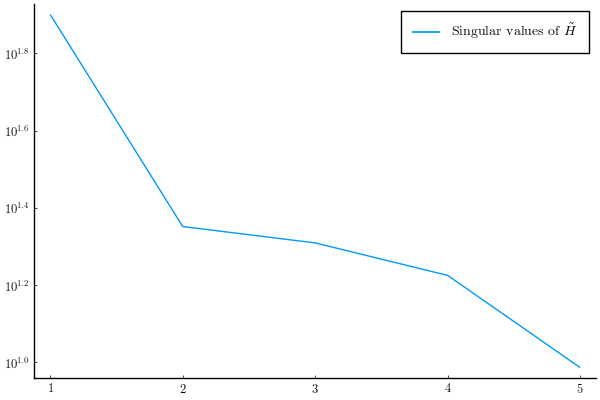

In [64]:
plot(Λ, yscale = :log10, label = L"Singular values of $\tilde{H}$")

In [65]:
Σy

5×5 Array{Float64,2}:
 0.01  0.0   0.0   0.0   0.0
 0.0   0.01  0.0   0.0   0.0
 0.0   0.0   0.01  0.0   0.0
 0.0   0.0   0.0   0.01  0.0
 0.0   0.0   0.0   0.0   0.01

In [66]:
X

25×500 Array{Float64,2}:
  2.60216      3.27544    -2.90625     …  -2.16729    2.90199    -1.52723
 -0.0865647    3.17179     0.412954       -1.59451    7.83598    -0.0545033
 -0.296227     3.62496    -5.11158        -0.546955   1.54786    -0.199083
 -2.55572      7.92367     3.14015        -0.469227   7.03096    -4.15337
  1.53138      2.85557    -3.98364        -1.80017    4.23558    -0.121352
 -0.800239     0.0449221   1.69008     …  -1.19042   -0.0169941   1.57752
 -1.92539      1.32759    -0.0828986       0.087952   1.81457     0.142212
  0.270462    -0.309497    2.45546         1.8335     2.16885    -0.230161
 -0.0435719    0.811174   -1.28795         0.441739  -2.09429     0.0132305
  0.00770941   1.9331      0.49777         0.693711   1.9472     -1.91667
 -1.46795      0.520497    0.191345    …  -0.633261   2.20742    -1.25125
 -0.808819     0.942415   -2.58838        -1.40871   -0.310343   -1.31161
  0.0596656   -0.748671   -1.23675        -2.02089   -0.685217    0.7576
  2.23

In [18]:
X̃ = copy(X)

25×500 Array{Float64,2}:
 -5.5727     4.23604    -0.70766    …   0.182954   -2.82677    -6.00179
 -3.7668     0.897505   -0.557963       0.667749   -2.30837    -3.4508
  3.87634   -7.33427    -1.72964        5.63938     4.70071    -5.35683
 -4.65628    6.65526    -4.29969       -3.15667    -6.4906     -1.91185
  8.50601    9.53728    -0.842536       0.158517    8.49245     1.55743
  0.675814  -1.28678     1.26369    …  -0.539231   -0.413529    0.822683
 -2.23462    0.608204    0.223847       2.57055    -1.57911    -0.656576
 -1.36425    0.825764   -0.985709       2.64828     0.538921   -1.08114
  0.132179   1.56652    -1.96479        1.16745     1.04907     0.139461
 -1.0699    -1.33754    -1.67798       -1.36386    -1.75235    -1.26036
 -0.339793   0.487842    0.229286   …   2.2136     -0.499137   -0.315583
  0.458059  -1.06639     1.76083        0.735989   -0.348039    1.62533
  0.172314  -0.0137747   0.661316       1.79792     0.693606    0.376274
  0.159935  -0.220151    0.667816  

In [19]:
view(X̃,1:Ny, :) .= Σy^(-1/2)*view(X, 1:Ny, :)

5×500 view(::Array{Float64,2}, 1:5, :) with eltype Float64:
 -55.727    42.3604    -7.0766    84.3496  …    1.82954  -28.2677  -60.0179
 -37.668     8.97505   -5.57963  -97.6251       6.67749  -23.0837  -34.508
  38.7634  -73.3427   -17.2964   -89.4817      56.3938    47.0071  -53.5683
 -46.5628   66.5526   -42.9969    55.2177     -31.5667   -64.906   -19.1185
  85.0601   95.3728    -8.42536  -56.9152       1.58517   84.9245   15.5743

In [20]:
view(X̃,Ny+1:Ny+Nx, :) .= Σx^(-1/2)*view(X, Ny+1:Ny+Nx, :)

20×500 view(::Array{Float64,2}, 6:25, :) with eltype Float64:
  0.450543   -0.857852     0.842463    …  -0.359487    -0.275686    0.548456
 -1.48974     0.40547      0.149232        1.7137      -1.05274    -0.437718
 -0.909499    0.550509    -0.65714         1.76552      0.359281   -0.720758
  0.0881196   1.04435     -1.30986         0.778303     0.699378    0.092974
 -0.713265   -0.891691    -1.11865        -0.909238    -1.16824    -0.840241
 -0.226529    0.325228     0.152857    …   1.47573     -0.332758   -0.210389
  0.305373   -0.710924     1.17388         0.49066     -0.232026    1.08355
  0.114876   -0.00918316   0.440877        1.19862      0.462404    0.250849
  0.106623   -0.146767     0.44521        -0.185603    -0.376984   -0.738116
  1.85406    -0.423943     0.148911       -0.43992      1.16653     0.0457296
 -0.591631   -0.370647    -0.147731    …   1.07409      0.27028    -0.1442
  0.834925    0.399967    -1.20068         0.282006    -0.51446     0.56198
  1.23226     1.4

In [21]:
mean(X̃; dims = 2)

25×1 Array{Float64,2}:
 -1.9123195878476915
  5.62355984328724
  1.9240922031307155
  5.150865737233921
  6.519961011271431
  0.017280981645381454
 -0.041953314141381516
 -0.013815323401163811
  0.06722307017519807
  0.032482403300117625
 -0.03481486266677262
 -0.05329298200189522
 -0.04522540804239296
  0.027052468812530317
 -0.0037398269554653335
  0.07101174410289524
  0.033396936582383456
  0.1371428603148056
 -0.030407621970778516
 -0.03508700144535557
 -0.11995695634923077
  0.009896160911031592
 -0.011391303811468526
 -0.006363432097406759
  0.013398668207497038

In [22]:
H̃ - Σy^(-1/2)*H*Σx^(1/2)

5×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [26]:
Klowrank = Σx^(1/2)*V*Diagonal(Λ)*inv(Diagonal(Λ).^2 + I)*U'*Σy^(-1/2)

20×5 Array{Float64,2}:
  0.00747908    0.117882    -0.0573717   -0.135439    -0.0580409
  0.000109429   0.0384448   -0.120166     0.0517139   -0.0699019
  0.0821569     0.101932    -0.00600604  -0.0573036    0.0504563
 -0.0497314     0.0130812    0.0247234    0.0354695    0.00996605
  0.0242875     0.0278315    0.0665597    0.142451    -0.0468631
  0.101365      0.00162586   0.0807169    0.0157267    2.35573e-5
 -0.118118      0.00126556  -0.0736206   -0.0114895   -0.0534614
 -0.0132726    -0.0145882    0.030017    -0.0390492    0.0338819
  0.028185      0.00184355   0.00137985   0.103912     7.02792e-5
  0.0408288     0.00529388  -0.0687709   -0.102065     0.101868
 -0.0297812     0.00805336   0.0671239    0.0880144   -0.00846008
 -0.0870173    -0.00116533  -0.0661567   -0.00824214   0.00229523
  0.0106785     0.0367375   -0.0330286    0.11324      0.0692993
  0.01229      -0.00553854   0.0313712    0.0794732   -0.0057639
 -0.000135013  -0.00382914  -0.0946558   -0.0279714   -0.012603

In [27]:
K = Σx*H'*inv(H*Σx*H'+Σy)

20×5 Array{Float64,2}:
  0.00747908    0.117882    -0.0573717   -0.135439    -0.0580409
  0.000109429   0.0384448   -0.120166     0.0517139   -0.0699019
  0.0821569     0.101932    -0.00600604  -0.0573036    0.0504563
 -0.0497314     0.0130812    0.0247234    0.0354695    0.00996605
  0.0242875     0.0278315    0.0665597    0.142451    -0.0468631
  0.101365      0.00162586   0.0807169    0.0157267    2.35573e-5
 -0.118118      0.00126556  -0.0736206   -0.0114895   -0.0534614
 -0.0132726    -0.0145882    0.030017    -0.0390492    0.0338819
  0.028185      0.00184355   0.00137985   0.103912     7.02792e-5
  0.0408288     0.00529388  -0.0687709   -0.102065     0.101868
 -0.0297812     0.00805336   0.0671239    0.0880144   -0.00846008
 -0.0870173    -0.00116533  -0.0661567   -0.00824214   0.00229523
  0.0106785     0.0367375   -0.0330286    0.11324      0.0692993
  0.01229      -0.00553854   0.0313712    0.0794732   -0.0057639
 -0.000135013  -0.00382914  -0.0946558   -0.0279714   -0.012603

In [28]:
norm(Klowrank-K)

5.39650345926559e-16

In [29]:
Xpost = deepcopy(X)

25×500 Array{Float64,2}:
 -5.5727     4.23604    -0.70766    …   0.182954   -2.82677    -6.00179
 -3.7668     0.897505   -0.557963       0.667749   -2.30837    -3.4508
  3.87634   -7.33427    -1.72964        5.63938     4.70071    -5.35683
 -4.65628    6.65526    -4.29969       -3.15667    -6.4906     -1.91185
  8.50601    9.53728    -0.842536       0.158517    8.49245     1.55743
  0.675814  -1.28678     1.26369    …  -0.539231   -0.413529    0.822683
 -2.23462    0.608204    0.223847       2.57055    -1.57911    -0.656576
 -1.36425    0.825764   -0.985709       2.64828     0.538921   -1.08114
  0.132179   1.56652    -1.96479        1.16745     1.04907     0.139461
 -1.0699    -1.33754    -1.67798       -1.36386    -1.75235    -1.26036
 -0.339793   0.487842    0.229286   …   2.2136     -0.499137   -0.315583
  0.458059  -1.06639     1.76083        0.735989   -0.348039    1.62533
  0.172314  -0.0137747   0.661316       1.79792     0.693606    0.376274
  0.159935  -0.220151    0.667816  

In [89]:
view(Xpost, Ny+1:Ny+Nx, :) .= view(X,Ny+1:Ny+Nx,:) - Klowrank*(view(X,1:Ny,:) .- ystar)

20×500 view(::Array{Float64,2}, 6:25, :) with eltype Float64:
 -1.3885     -0.388919   1.52441    …   0.446284    1.9288    -0.708825
  1.02872     1.54203    1.47475        1.35228     1.3044    -0.334071
  1.15994    -1.65959   -1.01283       -0.566965    1.45718    0.970885
 -1.32873     0.695795   2.34191        2.55434     0.74722   -0.393565
  1.25672     1.88016    0.739059      -0.147507    0.759971   2.02799
  1.086       1.49757   -1.46361    …  -0.999746   -0.12705    0.890193
 -1.99143    -1.54507   -1.71899       -0.168126   -3.26826   -2.67626
  1.63705     0.345203   2.00078        0.419489    2.17862    0.862842
  0.917919    2.74885    0.227854       1.0219      1.02152    2.38825
 -2.31747     1.58233   -0.473007       1.04081     1.45414   -0.766868
  1.8376      1.40496   -1.9422     …  -1.36383     0.279661   0.902549
 -0.646295    0.811346  -0.0381655      1.1973      1.15704   -0.867745
  0.111382   -0.216173  -1.50284        0.144627    0.416603  -1.21129
  1.46

In [90]:
Xpost

25×500 Array{Float64,2}:
  6.73689     2.7492    13.7799     …   2.85384     4.91019    6.0684
  6.39059     1.27703    3.1138        -3.6761      2.33419    6.41564
  3.3852      5.86613   -0.203432       1.31903     5.90363    3.03739
  1.26476    -4.51075    4.58518       11.5688     -0.304026   6.74989
  1.19418     7.81381   -4.60762        5.43186     1.95165    6.67825
 -1.3885     -0.388919   1.52441    …   0.446284    1.9288    -0.708825
  1.02872     1.54203    1.47475        1.35228     1.3044    -0.334071
  1.15994    -1.65959   -1.01283       -0.566965    1.45718    0.970885
 -1.32873     0.695795   2.34191        2.55434     0.74722   -0.393565
  1.25672     1.88016    0.739059      -0.147507    0.759971   2.02799
  1.086       1.49757   -1.46361    …  -0.999746   -0.12705    0.890193
 -1.99143    -1.54507   -1.71899       -0.168126   -3.26826   -2.67626
  1.63705     0.345203   2.00078        0.419489    2.17862    0.862842
  0.917919    2.74885    0.227854       1.0219 

In [91]:
mean(state(Xpost, Ny, Nx); dims = 2)[:,1]

20-element Array{Float64,1}:
  0.11455888781735833
  0.3749517928568419
  0.67734919997317
  0.7516646601756366
  0.07841237454364597
 -0.3484693388252838
 -2.0842081223024165
  1.4936776465459254
  1.2940132477027377
 -0.23484449614002312
  0.10199654503096257
  0.32375135499484675
 -0.06948324305128244
 -0.04589870378883893
  0.034746584242670506
  1.9834430827948357
  0.4520788730071775
  1.8326848384197034
  1.2407985585163652
  0.44564117664541997

In [92]:
xstar

20-element Array{Float64,1}:
  0.1823912181057712
  1.6962334180236271
  0.02433059438339577
 -0.41938227806904216
 -0.861816161971601
 -0.3007009126908583
 -2.3606161493053808
 -0.2830595473570359
  1.9615936601858266
  0.7828355041945867
 -1.6224810399873466
 -0.16276924813973936
 -1.390189283515601
 -0.20989918453980172
 -0.434312585815559
  3.1816435142948833
  1.201749161892224
  2.0488017592255696
  0.9147103469532316
  0.4776891603062241

In [101]:
mean(state(X, Ny, Nx); dims = 2)[:,1] + K*(ystar - H*mean(state(X, Ny, Nx); dims = 2)[:,1])

20-element Array{Float64,1}:
  0.11403685023559404
  0.3750633231113875
  0.6778726840296159
  0.7512432490513574
  0.07819686680566594
 -0.348559186978047
 -2.083356596786177
  1.494362094747629
  1.2942831816969969
 -0.23455837676334176
  0.10107652706278011
  0.3239986903915998
 -0.06953405889145334
 -0.045192884172523075
  0.034786853071279426
  1.9830175079377241
  0.45164297670867226
  1.8327624634727637
  1.2409097002047855
  0.445034917496297

In [103]:
xstar

20-element Array{Float64,1}:
  0.1823912181057712
  1.6962334180236271
  0.02433059438339577
 -0.41938227806904216
 -0.861816161971601
 -0.3007009126908583
 -2.3606161493053808
 -0.2830595473570359
  1.9615936601858266
  0.7828355041945867
 -1.6224810399873466
 -0.16276924813973936
 -1.390189283515601
 -0.20989918453980172
 -0.434312585815559
  3.1816435142948833
  1.201749161892224
  2.0488017592255696
  0.9147103469532316
  0.4776891603062241

In [102]:
mean(state(X, Ny, Nx) ;dims = 2)[:,1]

20-element Array{Float64,1}:
 -0.018018596032057795
  0.12188813738211286
  0.006553537152681995
 -0.029215015370077695
  0.048321769842227066
  0.024954739422105424
  0.06140301139508675
  0.0053960508964161795
  0.13092731465125282
 -0.00460343959941531
  0.027884470326816485
 -0.050409765301464814
  0.06060558385436248
  0.04517811500668236
 -0.006471247880543713
  0.027399755297110938
 -2.9137394992339694e-5
 -0.014776970870476278
  0.06343623296540639
  0.028448526837576267